In [439]:
import requests
from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [440]:
#send request

url = 'https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm'

page = requests.get(url)

page.text

soup = BeautifulSoup(page.content)

In [441]:
page

<Response [403]>

In [442]:
page_page = soup(page.text, 'html.parser')

In [443]:
page.content

b'<!DOCTYPE html><html><head><title>Apache Tomcat - Error report</title><style type="text/css">H1 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:22px;} H2 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:16px;} H3 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:14px;} BODY {font-family:Tahoma,Arial,sans-serif;color:black;background-color:white;} B {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;} P {font-family:Tahoma,Arial,sans-serif;background:white;color:black;font-size:12px;}A {color : black;}A.name {color : black;}.line {height: 1px; background-color: #525D76; border: none;}</style> </head><body><h1>HTTP Status 403 - Bots not allowed</h1><div class="line"></div><p><b>type</b> Status report</p><p><b>message</b> <u>Bots not allowed</u></p><p><b>description</b> <u>Access to the specified resource has been forbidden.</u></p><hr class="line"><h3>Apache T

In [444]:
#Cleans up code; more readable.
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Apache Tomcat - Error report
  </title>
  <style type="text/css">
   H1 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:22px;} H2 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:16px;} H3 {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;font-size:14px;} BODY {font-family:Tahoma,Arial,sans-serif;color:black;background-color:white;} B {font-family:Tahoma,Arial,sans-serif;color:white;background-color:#525D76;} P {font-family:Tahoma,Arial,sans-serif;background:white;color:black;font-size:12px;}A {color : black;}A.name {color : black;}.line {height: 1px; background-color: #525D76; border: none;}
  </style>
 </head>
 <body>
  <h1>
   HTTP Status 403 - Bots not allowed
  </h1>
  <div class="line">
  </div>
  <p>
   <b>
    type
   </b>
   Status report
  </p>
  <p>
   <b>
    message
   </b>
   <u>
    Bots not allowed
   </u>
  </p>
  <p>
   <b>
    des

In [445]:
#Stores all the content into a list
soup.find_all('div', {'class': 'col-12 col-lg-6'})[:1]

[]

In [446]:
soup_data = soup.find_all('div', {'class': 'col-12 col-lg-6'})[1]

IndexError: list index out of range

In [447]:
soup_data

<div class="col-12 col-lg-6"><div class="row"><div class="col-6 col-lg-4 dataPoint"> $108,000<span class="dataLabel"> Median Base Salary</span></div><div class="col-6 col-lg-4 dataPoint"> 4.3<span>/5</span><span class="dataLabel"> Job Satisfaction</span></div><div class="col-6 col-lg-4 dataPoint"> 6,510<span class="dataLabel"> Job Openings</span></div></div></div>

In [448]:
soup.find_all(id='Median Base Salary')

[]

In [449]:
for link in soup.find_all('p'):
    print(link.text,link.get('href'))

type Status report None
message Bots not allowed None
description Access to the specified resource has been forbidden. None


In [450]:
#Loop over soup data
#Store the items that we found in our analysis in a DataFrame
#Send the DataFrame to a CSV so we can store it

In [451]:
import pandas as pd

df = pd.read_csv('Top jobs of 2019.csv')

In [452]:
df.head(8)
#df.sort_values(by=['Median Base Salary'],ascending=True)

,Rank,Job Title,Median Base Salary,Job Satisfaction (5 point scale),Job Openings
0,47,Office Manager,"$42,000",3.9,"18,681"
1,28,Recruiter,"$48,000",4.1,"9,782"
2,41,Radiologic Technologist,"$48,000",4.0,"6,115"
3,42,Restaurant Manager,"$49,000",3.8,"21,754"
4,23,Executive Assistant,"$60,000",4.1,"4,858"
5,31,Data Analyst,"$60,000",3.9,"5,456"
6,13,Sales Manager,"$65,000",3.8,"21,695"
7,38,Facilities Manager,"$65,000",4.0,"3,472"


In [453]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

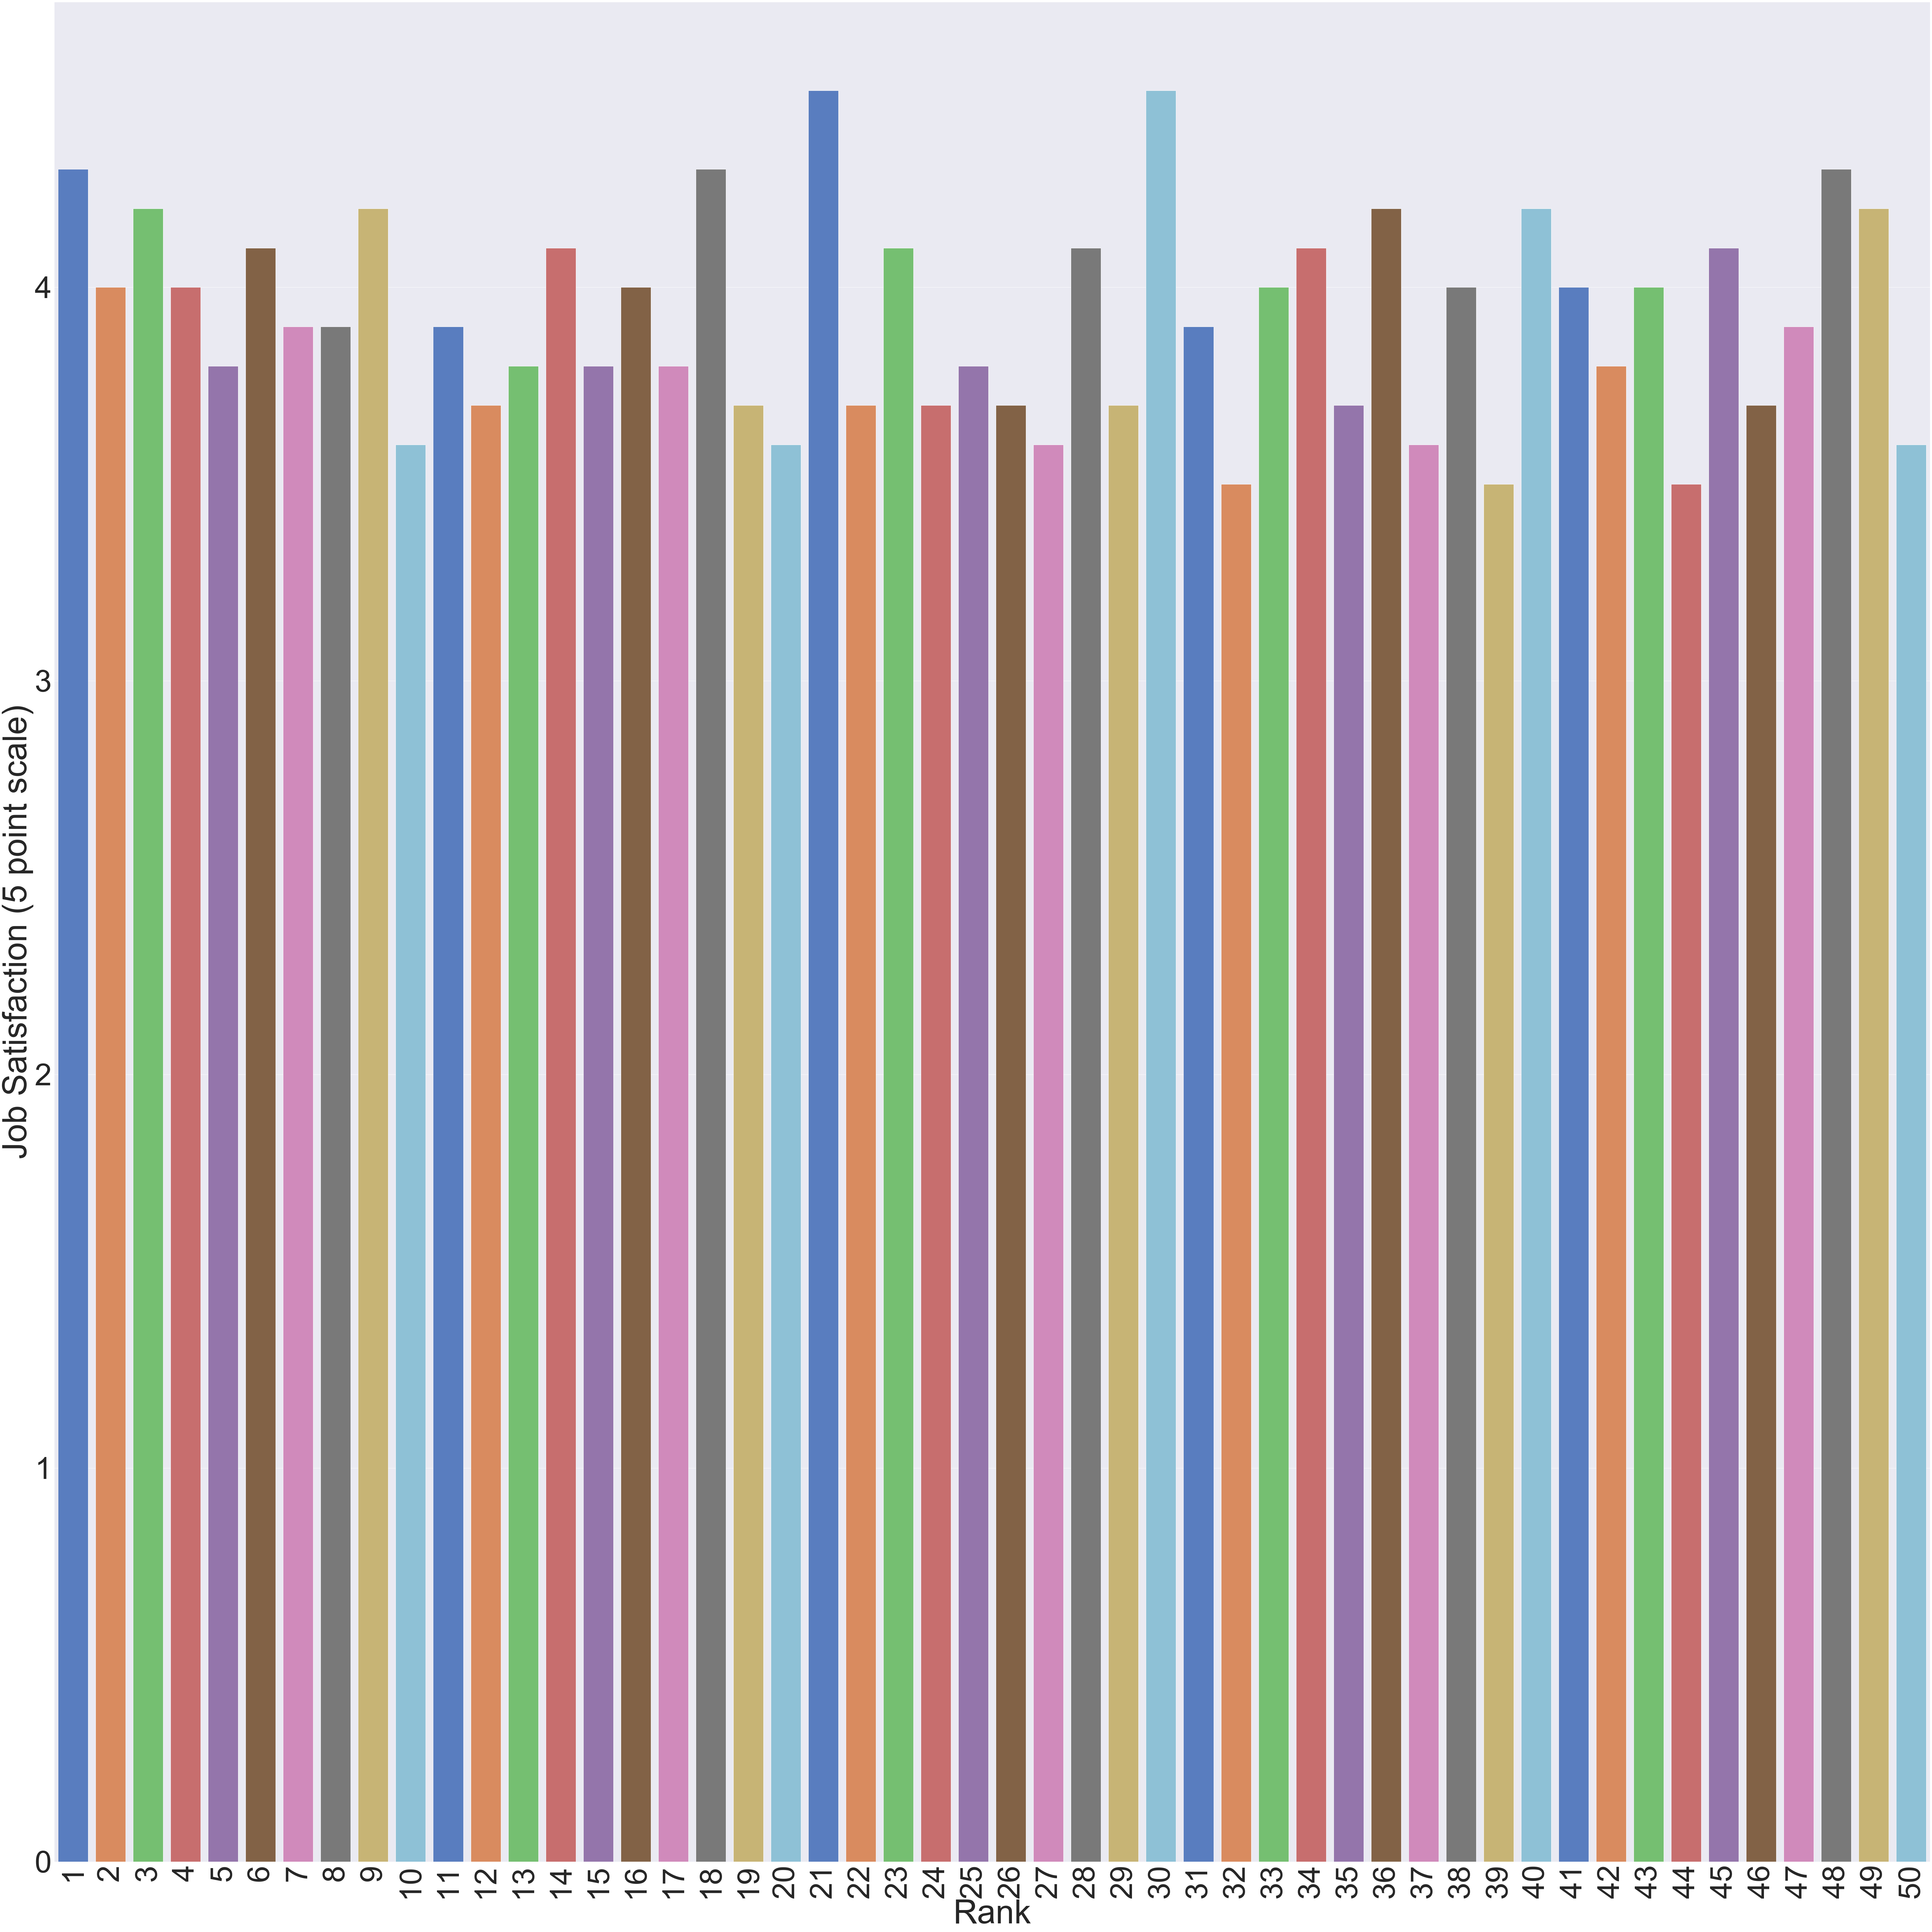

In [457]:
plt.figure(figsize=(100, 100))
sns.set(font_scale=10)
sns.setstyle='whitegrid'
sns.barplot(x='Rank',y='Job Satisfaction (5 point scale)',data=df,palette='muted')
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()